In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn

from df_utils import get_extended_orders_df

df = pd.read_csv('orders.csv',header=0, delimiter=';')

# Анализ Фурье
def get_fft_df(df, field, rhythm):
    per_year = 365
    years_per_dataset = 1
    if rhythm == 'week':
        per_year = 52 # int(365/7)
    elif rhythm == 'month':
        per_year = 12
    elif rhythm == 'season':
        per_year = 4
    else:
        sys.exit("wrong rhythm param")
    fft = tf.signal.rfft(df1[field])
    # tensorflow.python.framework.ops.EagerTensor -> numpy.ndarray -> pandas dataframe
    fft_df = pd.DataFrame( fft.numpy(), columns = ['amp'])
    fft_df['amp'] = np.abs(fft_df['amp'])
    fft_df['freq'] = np.arange(0, len(fft))/(years_per_dataset*per_year)
    return fft_df

# Построение графика
def plot_fft_plotly(df):
    fig = px.line(df_tmp , x='freq', y='amp', log_x=True, labels={'freq': 'Частота появления, количество раз/период', 'amp': 'Количество раз'}, title="Анализ Фурье для периодичности")
    fig.update_traces(mode='lines+markers')
    fig.update_xaxes(tick0=1, dtick=1)
    fig.update_yaxes(range=[0,200])
    fig.update_xaxes(range=[0.1,max(df)])
    return fig.show()

df1 = get_extended_orders_df(df)
df_tmp = get_fft_df(df1, 'orders_n', 'week')

[(0.1, 3.675), (0.0, 125.0)]

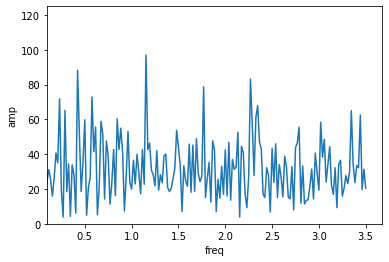

In [14]:
g = seaborn.lineplot( data=df_tmp, x='freq', y='amp' )
g.set(xlim=(0.1, None), ylim=(0, 125))